In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shapefile as shp 
import folium
import geopandas as gpd
from matplotlib.colors import ListedColormap
from IPython.display import Image
import contextily as ctx
import os

In [2]:
# Read the data
df = pd.read_csv('convert_MCMF_ALL_TIME_DATA.csv', sep = '\t')
df = df[df['Min Age'] <= 25]
df

/Users/rishabjayanthi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (14,28,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,IndexRow,Id,Logo Url,Program Name,Description,Org Name,Category Name,Capacity,Min Age,Max Age,...,Contact Email,Contact Phone,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,"4,568",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Academic Support,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,"4,569",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Work + Career,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,"4,562",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Academic Support,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,"4,563",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Music & Art.,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,"4,557",78746,https://cityoflearning-uploads.s3.amazonaws.co...,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,Managing Money.,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84873,"77,070",148925,https://cityoflearning-uploads.s3.amazonaws.co...,Medicina Scholars,<p>The Medicina Scholars program is designed t...,Hispanic Center of Excellence at UIC,Healthcare,NaN,18,24,...,pguzman7@uic.edu,312-996-4493,Free,NEAR WEST SIDE,Unknown_Code,NO,NaN,41.871422,-87.671524,NaN
84874,"75,634",146348,https://cityoflearning-uploads.s3.amazonaws.co...,Park Cleanup at Kelvyn Park,"<p ""="""">Teens can get service hours through th...",Hermosa Neighborhood Association,Helping Your Community.,NaN,4,65,...,kelvynparkpac@gmail.com,773-424-2081,Free,HERMOSA,Not Paid,NO,NO,41.929092,-87.738152,False
84875,"75,635",146348,https://cityoflearning-uploads.s3.amazonaws.co...,Park Cleanup at Kelvyn Park,"<p ""="""">Teens can get service hours through th...",Hermosa Neighborhood Association,Nature.,NaN,4,65,...,kelvynparkpac@gmail.com,773-424-2081,Free,HERMOSA,Not Paid,NO,NO,41.929092,-87.738152,False
84876,"75,638",146350,https://cityoflearning-uploads.s3.amazonaws.co...,Park Cleanup at Kelvyn Park,"<p ""="""">Teens can get service hours through th...",Hermosa Neighborhood Association,Helping Your Community.,NaN,4,65,...,kelvynparkpac@gmail.com,773-424-2081,Free,HERMOSA,Not Paid,NO,NO,41.929092,-87.738152,False


In [3]:
df.columns

Index(['IndexRow', 'Id', 'Logo Url', 'Program Name', 'Description', 'Org Name',
       'Category Name', 'Capacity', 'Min Age', 'Max Age', 'Meeting Type',
       'Address', 'City', 'State', 'Zipcode', 'Online Address', 'Program Url',
       'Registration Url', 'Registration Open', 'Registration Deadline',
       'Start Date', 'End Date', 'Start Time', 'End Time', 'Scheduled Mon',
       'Scheduled Tues', 'Scheduled Fri', 'Scheduled Sat', 'Scheduled Sun',
       'Scheduled Thurs', 'Scheduled Wed', 'Fri End Time', 'Fri Start Time',
       'Mon End Time', 'Mon Start Time', 'Sat End Time', 'Sat Start Time',
       'Sun End Time', 'Sun Start Time', 'Thurs End Time', 'Thurs Start Time',
       'Tues End Time', 'Tues Start Time', 'Wed End Time', 'Wed Start Time',
       'Contact Name', 'Contact Email', 'Contact Phone', 'Program Price',
       'Geographic Cluster Name', 'Program Pays Participants',
       'Program Has Scholarships', 'Program Provides Transportation',
       'Latitude', 'Longitu

In [4]:
missing_values = df.isnull().sum()
missing_values #insane amounts of missing values for some columns. 

IndexRow                               0
Id                                     0
Logo Url                           79573
Program Name                           0
Description                            0
Org Name                               0
Category Name                          2
Capacity                            7122
Min Age                                0
Max Age                                0
Meeting Type                           0
Address                             8770
City                                6226
State                               6227
Zipcode                             8717
Online Address                     27366
Program Url                         1301
Registration Url                    8841
Registration Open                  82963
Registration Deadline              60420
Start Date                             0
End Date                               0
Start Time                         12105
End Time                           12116
Scheduled Mon   

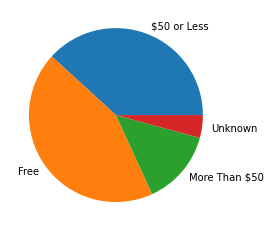

In [5]:
price_dist = 100*df.groupby(['Program Price']).size()/(len(df))
plt.pie(price_dist, labels = price_dist.keys())
plt.show()

In [6]:
price_dist

Program Price
$50 or Less      38.212420
Free             43.636385
More Than $50    13.928090
Unknown           4.223105
dtype: float64

In [7]:
category_pct = 100*df.groupby(['Category Name']).size()/(len(df))
category_pct #shows duplicate columns

Category Name
Academic Support               3.174716
Building & Fixing Things       1.427795
Building And Fixing Things     0.002364
Computers                      0.007092
Computers.                     1.316691
Customer/Human Service         0.046096
Digital Media.                 0.282486
Food                           0.001182
Food.                          0.644162
Healthcare                     0.685531
Helping Your Community         0.001182
Helping Your Community.        0.793088
Law                            0.008274
Managing Money.                0.419592
Math                           0.047278
Music & Art.                  23.529064
Nature.                        2.113325
Performance.                   0.704442
Reading & Writing              0.001182
Reading & Writing.            10.398790
Science                        1.811928
Science & Math                 0.005910
Social Studies                 0.203295
Sports + Wellness.            51.806018
Teaching                  

In [8]:
df['Category Name'].replace({'Building And Fixing Things': "Building & Fixing Things",
                            'Computers.': 'Computers',
                            'Digital Media.': 'Digital Media',
                            'Food.': 'Food',
                            'Helping Your Community.': 'Helping Your Community',
                            'Music & Art.': 'Music & Art',
                            'Reading & Writing.': 'Reading & Writing',
                            'Sports + Wellness.': 'Sports & Wellness',
                            'Helping Your Community.': 'Helping Your Community',
                            'Music & Art.': 'Music & Art',
                            'Nature.': 'Nature',
                            'Performance.':'Performance',
                            'Managing Money.': 'Managing Money',
                            'Perfomance.': 'Performance',
                            'Science': 'Science & Math',
                            'Math': 'Science & Math',
                            'Science ': 'Science & Math'}, inplace=True)

In [9]:
category_pct = 100*df.groupby(['Category Name']).size()/(len(df))
category_pct

Category Name
Academic Support             3.174716
Building & Fixing Things     1.430159
Computers                    1.323783
Customer/Human Service       0.046096
Digital Media                0.282486
Food                         0.645344
Healthcare                   0.685531
Helping Your Community       0.794270
Law                          0.008274
Managing Money               0.419592
Music & Art                 23.529064
Nature                       2.113325
Performance                  0.704442
Reading & Writing           10.399972
Science & Math               1.865116
Social Studies               0.203295
Sports & Wellness           51.806018
Teaching                     0.024821
Transportation               0.015365
Work + Career                0.525967
dtype: float64

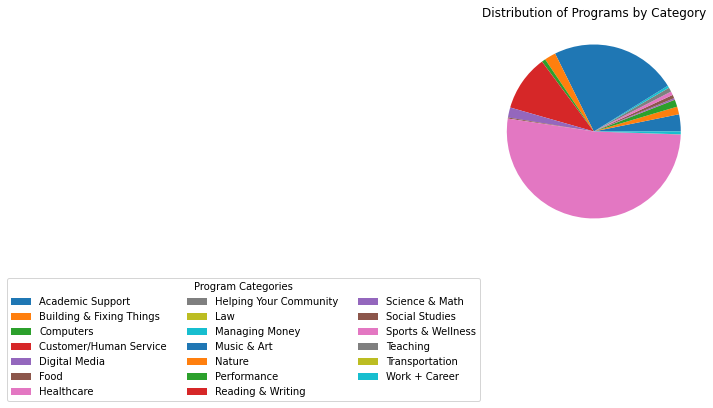

In [10]:
plt.pie(category_pct, labels = None)
plt.title('Distribution of Programs by Category')
plt.legend(title='Program Categories', labels=category_pct.keys(), loc='best',bbox_to_anchor=(0, -0.15), ncol=3)
plt.show()

In [11]:
category_dist = 100*df.groupby(['Category Name']).size()/(len(df))

category_dist_filt = category_dist.loc[lambda x : x > 1]
category_dist_filt

Category Name
Academic Support             3.174716
Building & Fixing Things     1.430159
Computers                    1.323783
Music & Art                 23.529064
Nature                       2.113325
Reading & Writing           10.399972
Science & Math               1.865116
Sports & Wellness           51.806018
dtype: float64

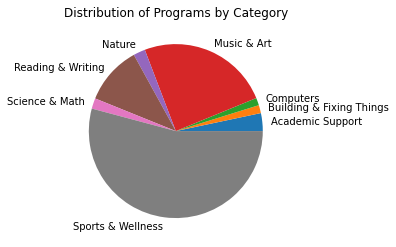

In [12]:
plt.pie(category_dist_filt, labels=category_dist_filt.keys())
plt.title('Distribution of Programs by Category')
plt.show()

In [13]:
category_pct = 100*df.groupby(['Meeting Type']).size()/(len(df))
category_pct

Meeting Type
face_to_face    86.204288
online          13.795712
dtype: float64

In [14]:
df['Capacity'].min()

0.0

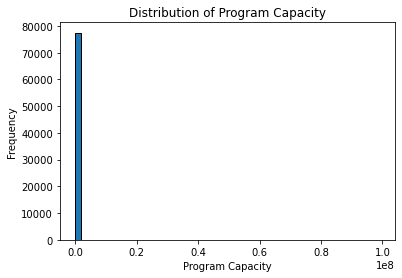

In [15]:
# Create a histogram of program capacity
capacity = df['Capacity'].dropna()
plt.hist(capacity, bins=50, edgecolor='black')
plt.xlabel('Program Capacity')
plt.ylabel('Frequency')
plt.title('Distribution of Program Capacity')
plt.show()

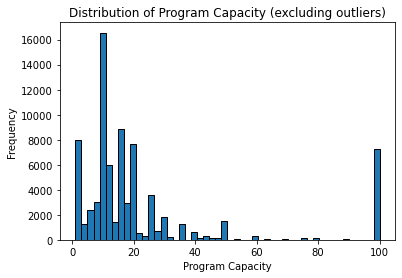

In [16]:
lower_bound = 1
upper_bound = df['Capacity'].quantile(0.95) # set the upper bound to the 95th percintile to omit outliers and 
capacity = df['Capacity'].clip(lower=lower_bound, upper=upper_bound)

# Create a histogram of program capacity
plt.hist(capacity, bins=50, edgecolor='black')
plt.xlabel('Program Capacity')
plt.ylabel('Frequency')
plt.title('Distribution of Program Capacity (excluding outliers)')
plt.show()

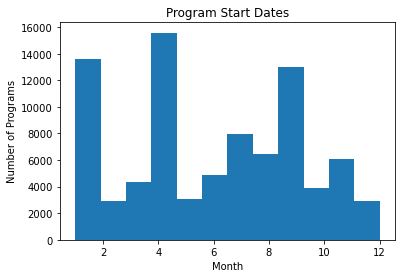

In [17]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

# Extract the month from the start date
df['Month'] = df['Start Date'].dt.month
plt.hist(df['Month'], bins=12)

# Set the x-axis label
plt.xlabel('Month')

# Set the y-axis label
plt.ylabel('Number of Programs')

# Set the chart title
plt.title('Program Start Dates')

# Show the chart
plt.show()

In [18]:
filename = os.path.join('Boundaries - Community Areas (current).geojson')
frame = gpd.read_file(filename)
frame.crs = {"init": "epsg:4326"}
frame.head()

/Users/rishabjayanthi/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


<AxesSubplot:>

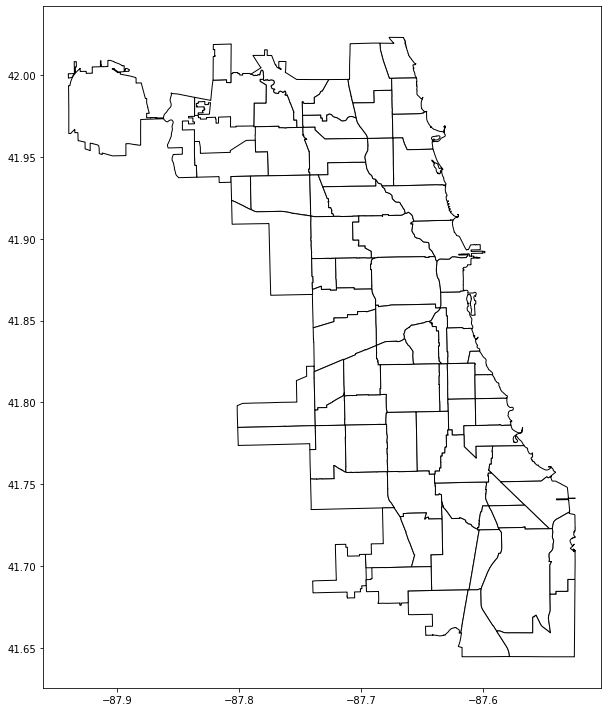

In [19]:
fig, ax = plt.subplots(figsize=(10, 14))
chimap = frame.plot(ax=ax, color="white", edgecolor="black")
chimap

/Users/rishabjayanthi/opt/anaconda3/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)
findfont: Font family ['Inconsolata'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Inconsolata'] not found. Falling back to DejaVu Sans.


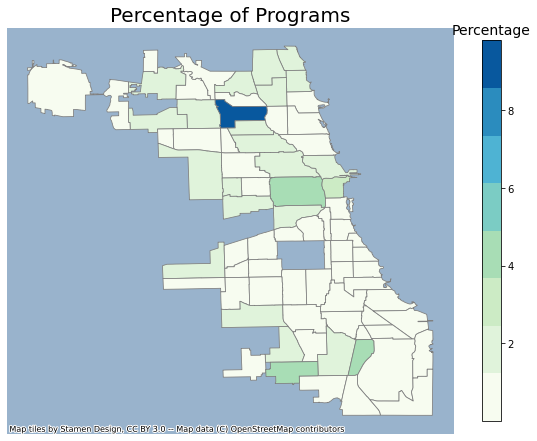

In [20]:
# Read in the Chicago community area shapefile
url = 'https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=GeoJSON'
chicago = gpd.read_file(url)

# Calculate the percentage of programs in each community area
total_programs = df['Id'].nunique()
program_counts = (df.groupby('Geographic Cluster Name')['Id']
                  .nunique()
                  .reset_index(name='count')
                  .assign(percentage=lambda x: (x['count'] / total_programs) * 100))
merged = chicago.merge(program_counts, left_on='community', right_on='Geographic Cluster Name')

# Create a custom colormap
cmap = ListedColormap(['#f7fcf0', '#e0f3db', '#ccebc5', '#a8ddb5', '#7bccc4', '#4eb3d3', '#2b8cbe', '#08589e'])

font = {'family': 'Inconsolata',
        'color':  'black',
        'weight': 'normal',
        'size': 20}

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(column='percentage', cmap=cmap, linewidth=0.8, edgecolor='gray', ax=ax)
ax.set_title('Percentage of Programs', fontdict=font)
ax.axis('off')

# Add a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=merged['percentage'].min(), vmax=merged['percentage'].max()))
sm._A = []
cbar = fig.colorbar(sm, orientation='vertical', shrink=0.7)
cbar.ax.set_title('Percentage', fontdict=font)
cbar.ax.title.set_fontsize(14) 

# Add basemap tiles from OpenStreetMap
ctx.add_basemap(ax)

In [21]:
# Create a choropleth map
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
folium.Choropleth(
    geo_data=merged.to_json(),
    name='choropleth',
    data=merged,
    columns=['community', 'percentage'],
    key_on='feature.properties.community',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percentage of Programs'
).add_to(m)

folium.LayerControl().add_to(m)

# Save the map 
m.save('map.html')

In [22]:
chi_map = gpd.read_file(url)
merged_df = pd.merge(left=chi_map, right=df, left_on='community', right_on='Geographic Cluster Name')
grouped_df = merged_df.groupby('community')['Id'].nunique()
percentages = (grouped_df / grouped_df.sum()) * 100
chi_map['Percentage Distribution'] = chi_map['community'].map(percentages)

findfont: Font family ['Inconsolata'] not found. Falling back to DejaVu Sans.


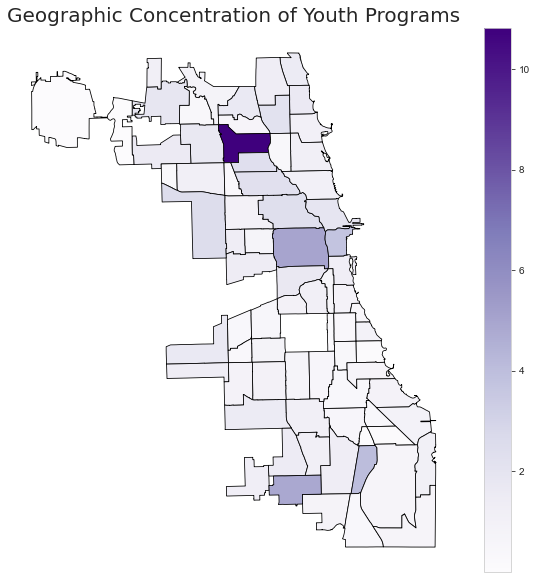

In [23]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,10))
chi_map.plot(column='Percentage Distribution', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='black', legend=True)
ax.set_axis_off()
ax.set_title('Geographic Concentration of Youth Programs', fontdict={'fontsize': '20', 'fontweight' : '3', 'fontname':'Inconsolata'})
plt.show()

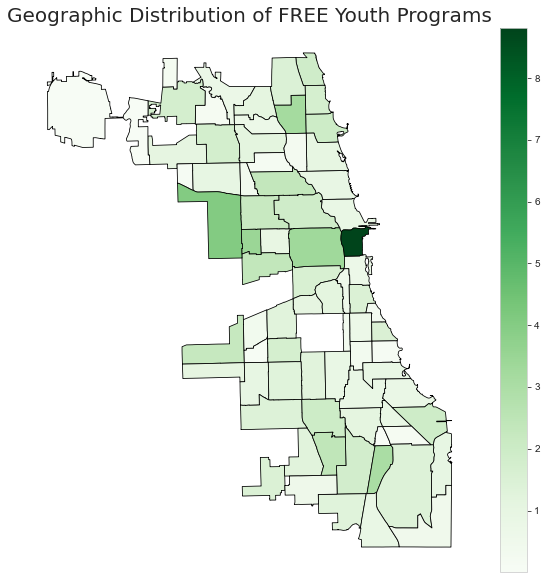

In [24]:
accessible_data = df[(df['Program Price'] == 'Free')]
accessible_merged = pd.merge(left=chi_map, right=accessible_data, left_on='community', right_on='Geographic Cluster Name')
accessible = accessible_merged.groupby('community')['Id'].nunique()

percentages = (accessible / accessible.sum()) * 100
chi_map['Percentage Distribution'] = chi_map['community'].map(percentages)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,10))
chi_map.plot(column='Percentage Distribution', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='black', legend=True)
ax.set_axis_off()
ax.set_title('Geographic Distribution of FREE Youth Programs', fontdict={'fontsize': '20', 'fontweight' : '3', 'fontname':'Inconsolata'})
plt.show()

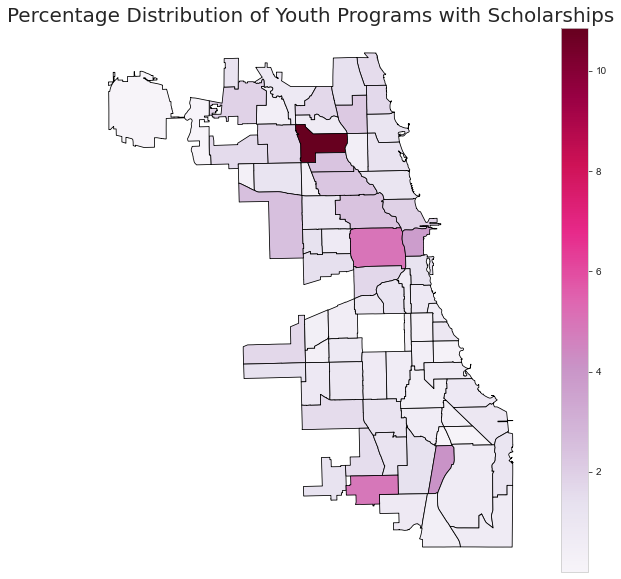

In [25]:
accessible_data = df[(df['Program Pays Participants'] == 'Not Paid')]
accessible_merged = pd.merge(left=chi_map, right=accessible_data, left_on='community', right_on='Geographic Cluster Name')
accessible = accessible_merged.groupby('community')['Id'].nunique()

percentages = (accessible / accessible.sum()) * 100
chi_map['Percentage Distribution'] = chi_map['community'].map(percentages)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,10))
chi_map.plot(column='Percentage Distribution', cmap='PuRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True)
ax.set_axis_off()
ax.set_title('Percentage Distribution of Youth Programs with Scholarships', fontdict={'fontsize': '20', 'fontweight' : '3', 'fontname':'Inconsolata'})
plt.show()

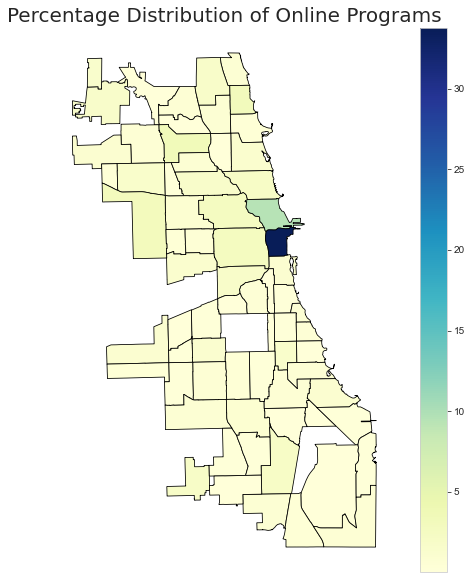

In [26]:
accessible_data = df[(df['Meeting Type'] == 'online')]
accessible_merged = pd.merge(left=chi_map, right=accessible_data, left_on='community', right_on='Geographic Cluster Name')
accessible = accessible_merged.groupby('community')['Id'].nunique()

percentages = (accessible / accessible.sum()) * 100
chi_map['Percentage Distribution'] = chi_map['community'].map(percentages)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,10))
chi_map.plot(column='Percentage Distribution', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='black', legend=True)
ax.set_axis_off()
ax.set_title('Percentage Distribution of Online Programs', fontdict={'fontsize': '20', 'fontweight' : '3', 'fontname':'Inconsolata'})
plt.show()

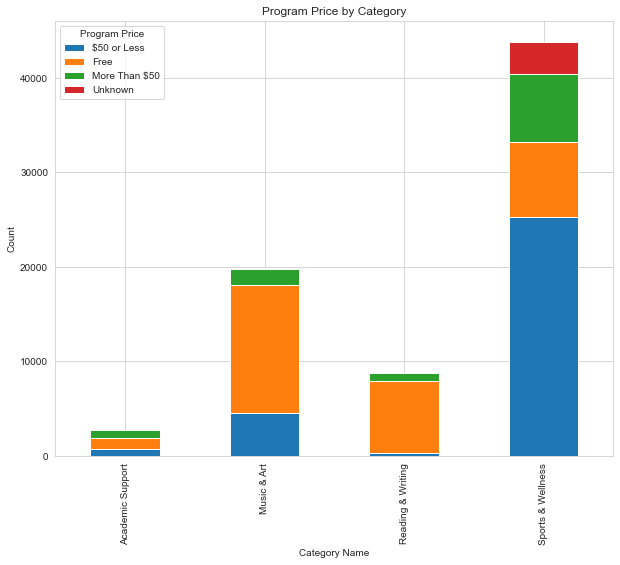

In [27]:
# Filter the data by the four categories of interest
categories = ['Music & Art', 'Sports & Wellness', 'Academic Support', 'Reading & Writing']
df_filtered = df[df['Category Name'].isin(categories)]

# Create a pivot table to count the number of programs for each category and price
table = pd.pivot_table(df_filtered, index='Category Name', columns='Program Price', values='Id', aggfunc='count')

# Plot the stacked bar chart
ax = table.plot(kind='bar', stacked=True, figsize=(10, 8))
ax.set_xlabel('Category Name')
ax.set_ylabel('Count')
ax.set_title('Program Price by Category')
plt.show()


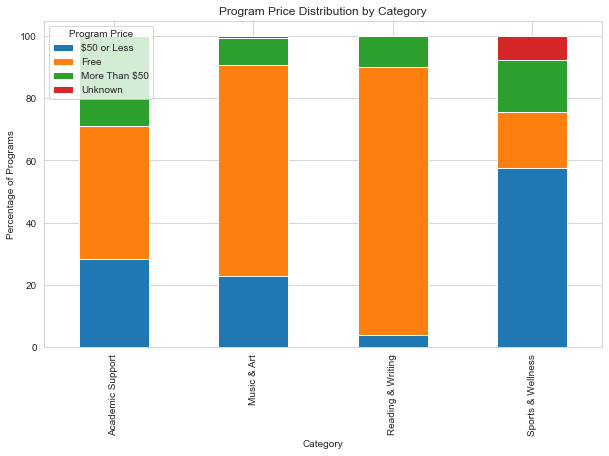

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# create a subset of the data for the four selected categories
selected_cats = ["Music & Art", "Sports & Wellness", "Academic Support", "Reading & Writing"]
df_sub = df[df["Category Name"].isin(selected_cats)]

# group the data by Category and Program Price
grouped = df_sub.groupby(["Category Name", "Program Price"])["Id"].count().reset_index()

# calculate the total number of programs in each category
total_by_cat = grouped.groupby("Category Name")["Id"].sum().reset_index()

# calculate the percentage of each Program Price value for each category
grouped["percentage"] = grouped.apply(lambda x: x["Id"] / total_by_cat.loc[total_by_cat["Category Name"]==x["Category Name"], "Id"].values[0] * 100, axis=1)

# pivot the data to make a grouped bar chart
pivot = grouped.pivot(index="Category Name", columns="Program Price", values="percentage")

# plot the bar chart
ax = pivot.plot(kind="bar", stacked=True, figsize=(10, 6))
ax.set_xlabel("Category",rotation=0)
ax.set_ylabel("Percentage of Programs")
ax.set_title("Program Price Distribution by Category")
plt.show()


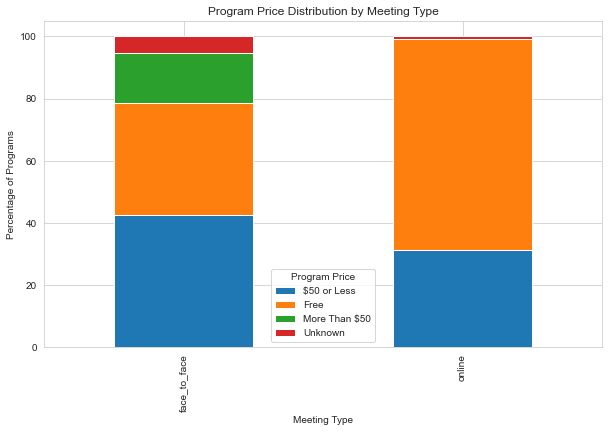

In [29]:
# group the data by Category and Program Price
grouped = df_sub.groupby(["Meeting Type", "Program Price"])["Id"].count().reset_index()

# calculate the total number of programs in each category
total_by_cat = grouped.groupby("Meeting Type")["Id"].sum().reset_index()

# calculate the percentage of each Program Price value for each category
grouped["percentage"] = grouped.apply(lambda x: x["Id"] / total_by_cat.loc[total_by_cat["Meeting Type"]==x["Meeting Type"], "Id"].values[0] * 100, axis=1)

# pivot the data to make a grouped bar chart
pivot = grouped.pivot(index="Meeting Type", columns="Program Price", values="percentage")

# plot the bar chart
ax = pivot.plot(kind="bar", stacked=True, figsize=(10, 6))
ax.set_xlabel("Meeting Type",rotation=0)
ax.set_ylabel("Percentage of Programs")
ax.set_title("Program Price Distribution by Meeting Type")
plt.show()

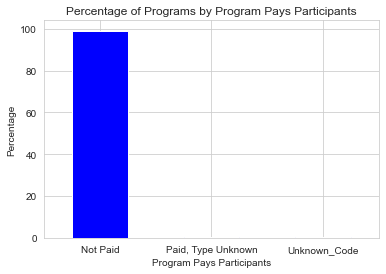

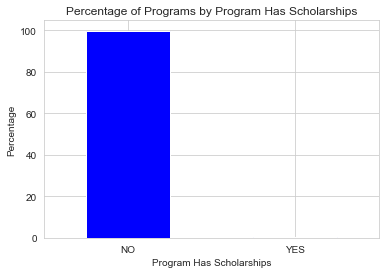

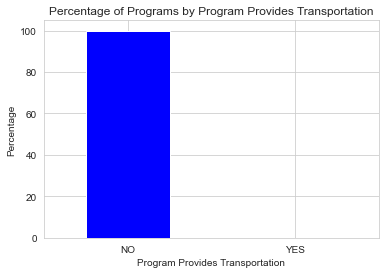

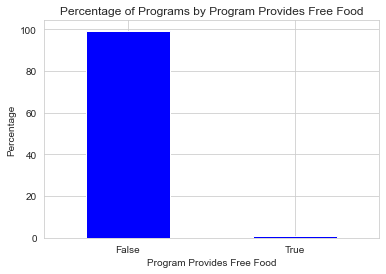

In [30]:
variables = ['Program Pays Participants', 'Program Has Scholarships', 'Program Provides Transportation', 'Program Provides Free Food']

# Loop through the variables and make a bar plot for each one
for var in variables:
    # Get the counts for each value of the variable
    counts = df[var].value_counts()
    # Calculate the percentages
    percentages = counts / counts.sum() * 100
    # Plot the percentages
    ax = percentages.plot(kind='bar', rot=0, color='blue')
    # Set the axis labels and title
    ax.set_xlabel(var)
    ax.set_ylabel('Percentage')
    ax.set_title('Percentage of Programs by {}'.format(var))
    # Display the plot
    plt.show()

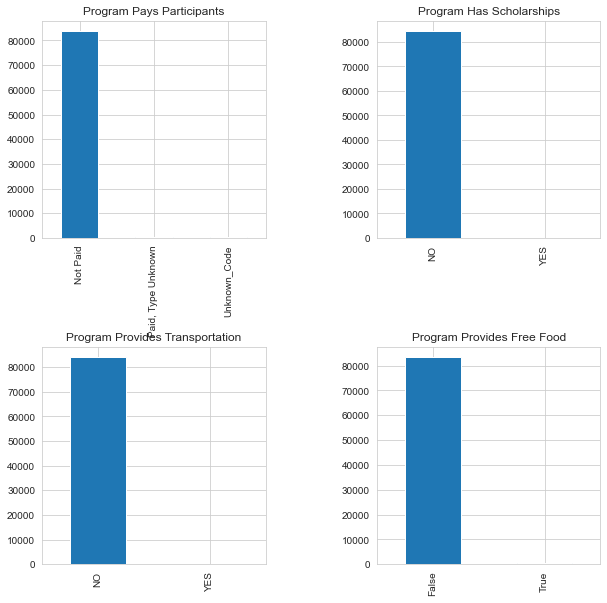

In [31]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot the first variable
df['Program Pays Participants'].value_counts().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Program Pays Participants')

# Plot the second variable
df['Program Has Scholarships'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Program Has Scholarships')

# Plot the third variable
df['Program Provides Transportation'].value_counts().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Program Provides Transportation')

# Plot the fourth variable
df['Program Provides Free Food'].value_counts().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Program Provides Free Food')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the plot
plt.show()